In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
# Load Dataset
df=pd.read_csv('./Assets/dataset.csv')

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Encoding the nominal qualitative data
df['CentralAir']=df['CentralAir'].apply(lambda x: 1 if 'Y' in x else 0)
df['KitchenQual'] = df['KitchenQual'].apply(lambda x: {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}.get(x, 0))
df['HeatingQC'] = df['HeatingQC'].apply(lambda x: {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}.get(x, 0))
df['ExterQual'] = df['ExterQual'].apply(lambda x: {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}.get(x, 0))
df['BsmtQual'] = df['BsmtQual'].apply(lambda x: {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}.get(x, 0))

In [6]:
# get faetures which are object (str, etc...)
object_dtype_features=[]
for index,col in enumerate(df.columns):
    if df[col].dtype=='object':
        object_dtype_features.append(index)

In [7]:
num_df=df.drop(columns=np.array(df.columns)[object_dtype_features])
num_df.GarageYrBlt.fillna(0,inplace=True)
num_df.MasVnrArea.fillna(value=0,inplace=True)
num_df.LotFrontage.fillna(np.mean(df.LotFrontage),inplace=True)
num_df=num_df.drop(columns='Id',axis=1)

In [8]:
pd.DataFrame(num_df.isna().sum().sort_values(ascending=False)).head()

,0
MSSubClass,0
GarageArea,0
HalfBath,0
BedroomAbvGr,0
KitchenAbvGr,0


In [27]:
num_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF', 'PoolArea', 'SalePrice',
       'age', 'TotalSF', 'TotalFinBsmt', 'TotalBsmtBathrooms',
       'TotalBathrooms', 'HasFireplace', 'TotalPorchArea', 'GarageAge'],
      dtype='object')

In [10]:
num_df['age']=num_df['YrSold']-num_df['YearBuilt']
num_df['TotalSF'] = num_df['TotalBsmtSF']+num_df['GarageArea'] # add
num_df['TotalFinBsmt']=num_df['BsmtFinSF1']+num_df['BsmtFinSF2']
num_df['TotalBsmtBathrooms']=num_df['BsmtFullBath']+num_df['BsmtHalfBath']
num_df['TotalBathrooms'] = num_df['FullBath'] + num_df['HalfBath']
num_df['HasFireplace'] = num_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
num_df['TotalPorchArea'] = num_df['OpenPorchSF'] + num_df['EnclosedPorch'] + num_df['3SsnPorch'] + num_df['ScreenPorch']
num_df['GarageAge'] = num_df.apply(lambda row: row['YrSold'] - row['GarageYrBlt'] if row['GarageYrBlt'] != 0 else 0, axis=1)


In [11]:
num_df = num_df.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','YrSold','YearBuilt','FullBath','HalfBath','TotalBsmtSF','1stFlrSF','2ndFlrSF','Fireplaces','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath'], axis=1)


In [12]:
num_df= num_df.drop(['BsmtUnfSF','MiscVal','MoSold','YearRemodAdd','GarageYrBlt','GarageArea','MSSubClass'],axis=1)

In [13]:
num_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF', 'PoolArea', 'SalePrice',
       'age', 'TotalSF', 'TotalFinBsmt', 'TotalBsmtBathrooms',
       'TotalBathrooms', 'HasFireplace', 'TotalPorchArea', 'GarageAge'],
      dtype='object')

In [14]:
len(num_df.columns)
columns_needed_list=[
       'LotFrontage', 
       'MasVnrArea', 'LowQualFinSF', 'GrLivArea','BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd',  'GarageCars',
        'WoodDeckSF', 'age', 'TotalSF','PoolArea'
       ,'TotalFinBsmt','TotalBsmtBathrooms', 'TotalBathrooms', 'HasFireplace',
       'TotalPorchArea','GarageAge','CentralAir','HeatingQC','KitchenQual','BsmtQual','SalePrice']

<Axes: >

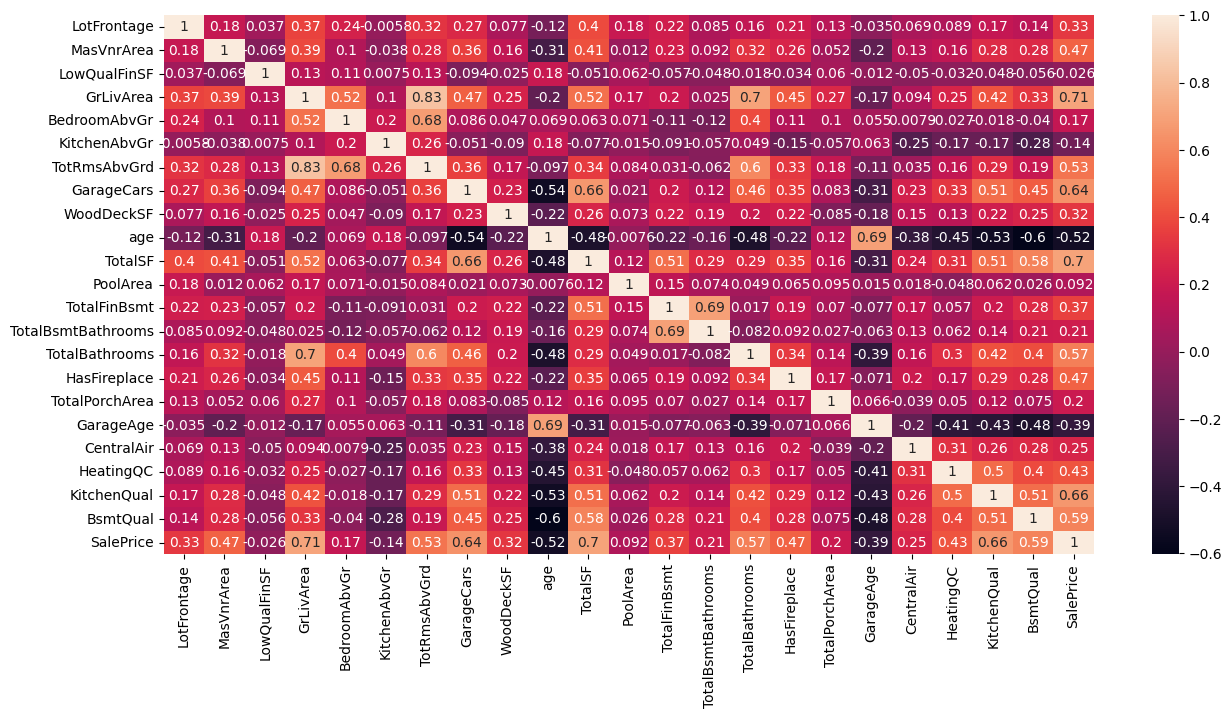

In [30]:
corrs=num_df[columns_needed_list].corr()
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(corrs,annot=True)

Text(0.5, 1.0, 'scores for k-folds during training')

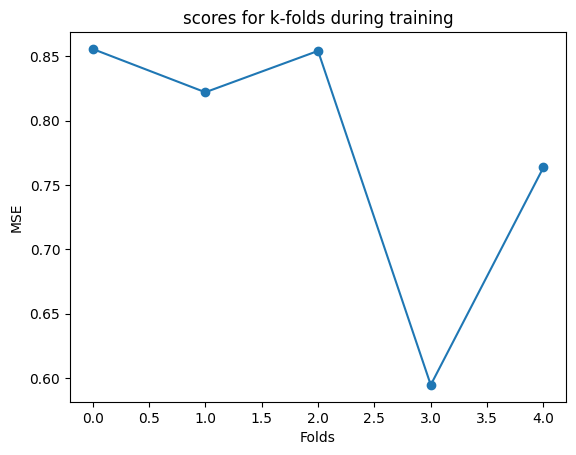

In [32]:
# Trying the hyperparameter alpha on the ridge regressor to find the best fitting for the data.
params={"alpha":[0.01,0.1,1,2,5,10,15]}

kf = KFold(n_splits=5, shuffle=True, random_state=41)

ln = LinearRegression()

grid=GridSearchCV(Ridge(),param_grid=params,cv=kf)

X=num_df.drop(columns='SalePrice')
y=num_df.SalePrice

# Splitting Data
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=41)


#Fitting Data
ln.fit(x_train,y_train)

lrg=grid.fit(x_train,y_train)

lr=lrg.best_estimator_

# Applying the cv to improve our model and get higher accuracy than expected.
cv_scores=cross_val_score(lr,x_train,y_train,cv=kf)
plt.plot(cv_scores,marker='o')
plt.xlabel('Folds')
plt.ylabel('MSE')
plt.title('scores for k-folds during training')
# print(lr)

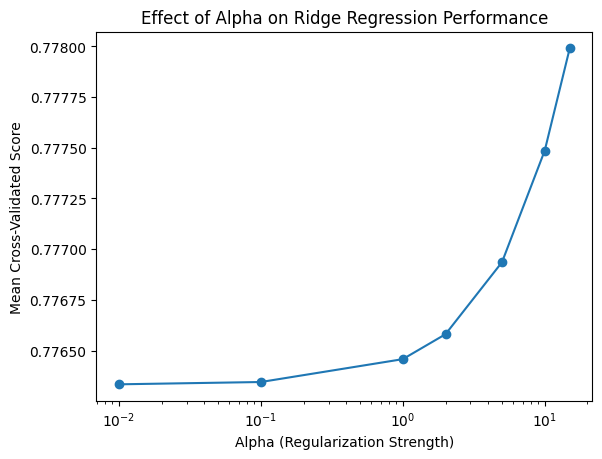

Ridge(alpha=15)


In [34]:
ridge_model = lrg

# Extract best estimator
best_ridge = lr

# Plot the cross-validated scores for different values of alpha
alphas = [param["alpha"] for param in ridge_model.cv_results_["params"]]
scores = ridge_model.cv_results_["mean_test_score"]

plt.plot(alphas, scores, marker='o')
plt.xscale('log')  # Since alpha values are typically in a logarithmic scale
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Cross-Validated Score')
plt.title('Effect of Alpha on Ridge Regression Performance')
plt.show()
print(lr)

In [35]:
print('Ridge CVs',end='\n'+'#'*50+'\n')
print('CVscores list for 5 folds: ',cv_scores)
print('CVscores mean --> {:2f}'.format((cv_scores.mean()*100)))

Ridge CVs
##################################################
CVscores list for 5 folds:  [0.8556187  0.8219549  0.8540785  0.59464585 0.76365323]
CVscores mean --> 77.799024


In [36]:
print("accuracy of (LinearRegression)      ", (ln.score(x_test,y_test)*100).round(4),'%')

print("accuracy of (Regulized Model) Ridge ",(lr.score(x_test,y_test)*100).round(4),'%')


accuracy of (LinearRegression)       87.6944 %
accuracy of (Regulized Model) Ridge  87.6714 %


In [20]:
from sklearn.metrics import mean_squared_error
y_pred=lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 657115136.0511184


# Visualizing Coef_ of Models (`Ridge` <span style="color:rgb(15,204,105);">vs</span> `LinearRegression`)

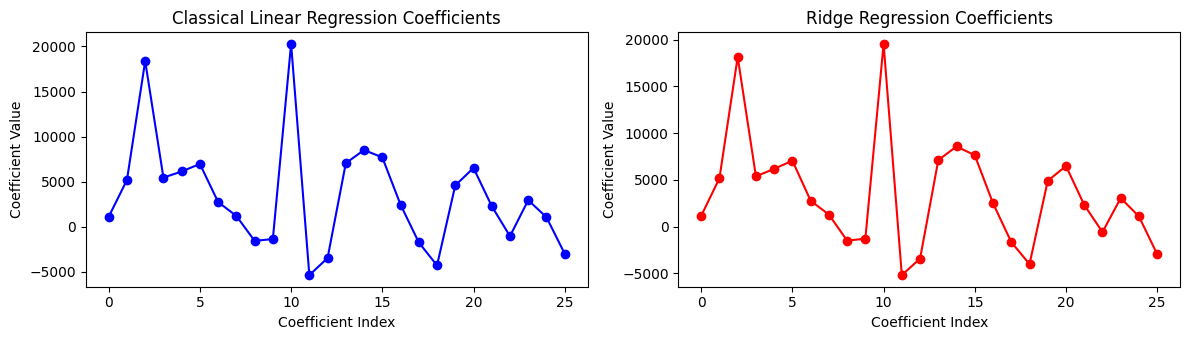

In [21]:

fig, ax = plt.subplots(1, 2, figsize=(12, 3.5), sharex=True)

# Line plot with markers for Classical Linear Regression Coefficients
ax[0].plot(range(len(ln.coef_)), ln.coef_, marker='o', linestyle='-', color='b')
ax[0].set_title('Classical Linear Regression Coefficients')
ax[0].set_xlabel('Coefficient Index')
ax[0].set_ylabel('Coefficient Value')

# Line plot with markers for Ridge Regression Coefficients
ax[1].plot(range(len(lr.coef_)), lr.coef_, marker='o', linestyle='-', color='r')
ax[1].set_title('Ridge Regression Coefficients')
ax[1].set_xlabel('Coefficient Index')
ax[1].set_ylabel('Coefficient Value')

plt.tight_layout()
plt.show()


# KNN

In [22]:
from math import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
rmse_val=[]
cvs_score=[]
mse_list=[]
features_needed=1
for K in range(0,25,2):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K,n_jobs=-1)


    model.fit(x_train, y_train)  #fit the model

    pred=model.predict(x_test) #make prediction on test set
    
    mse_list.append(mean_squared_error(y_test,pred))

    error = r2_score(y_test,pred) #calculate R2

    rmse_val.append(error) #store R2 values

    print('R2 value for k= ' , K , 'is:', error)

R2 value for k=  1 is: 0.7883971640022722
R2 value for k=  3 is: 0.8594534274127352
R2 value for k=  5 is: 0.8497560666993808
R2 value for k=  7 is: 0.857051415697741
R2 value for k=  9 is: 0.8567961887417044
R2 value for k=  11 is: 0.852597877582741
R2 value for k=  13 is: 0.8525961591925999
R2 value for k=  15 is: 0.8518000821612521
R2 value for k=  17 is: 0.8474470071988223
R2 value for k=  19 is: 0.8422270761357682
R2 value for k=  21 is: 0.839734558856748
R2 value for k=  23 is: 0.8413342864819424
R2 value for k=  25 is: 0.8421142048833947


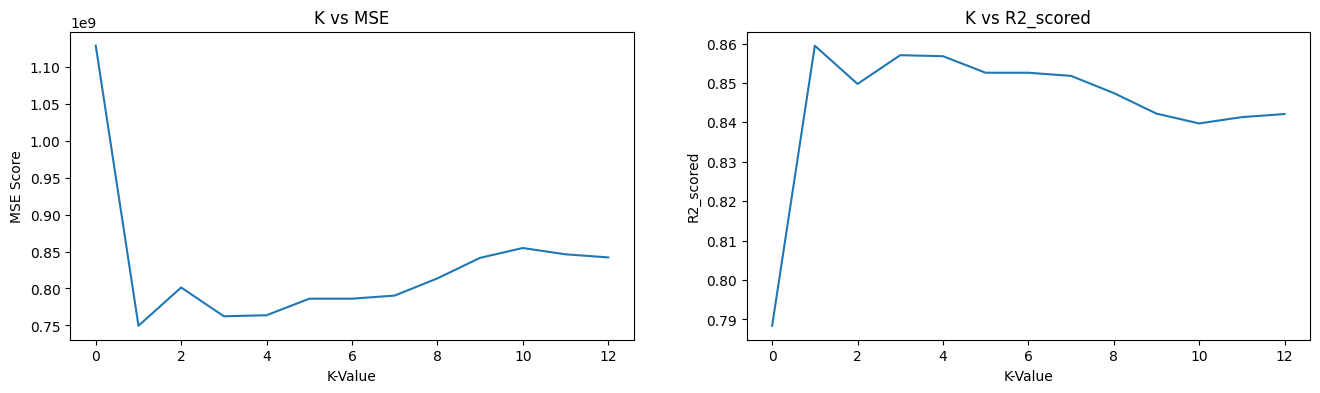

In [23]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(mse_list)
plt.title('K vs MSE')
plt.xlabel('K-Value')
plt.xscale('linear')
plt.ylabel('MSE Score')
plt.subplot(1,2,2)
plt.plot(rmse_val)
plt.title('K vs R2_scored')
plt.xlabel('K-Value')
plt.ylabel('R2_scored');

In [24]:
num_df.shape

(1460, 27)

In [25]:
knn=KNeighborsRegressor(n_neighbors=3)

knn.fit(x_train,y_train)
print("accuracy of KNeighborsRegressor (KNN):",(knn.score(x_test,y_test)*100).round(4),'%')

accuracy of KNeighborsRegressor (KNN): 85.9453 %
